Exploratory Data Analysis:

In [1]:
#Loading necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
loan_dataset=pd.read_csv('loan.csv')

In [3]:
#Basic Information about the data and display
print(loan_dataset.shape)
loan_dataset.head()

(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Undertsanding the data by checking its row count,column count and number of null values,duplicate values and number of unique values.

In [4]:
#Number of Rows and Columns in the dataset
print('Number of Rows:',loan_dataset.shape[0])
print('Number of Columns:',loan_dataset.shape[1])
#Number of Missing values in the dataset
print('Number of Missing values in the dataset:',loan_dataset.isnull().sum().sum())
#Number of unique values in the dataset
print('Number of Unique values in the dataset:',loan_dataset.nunique().sum())
#Number of Duplicates in the dataset
print('Number of Duplicate data in dataset:',loan_dataset.duplicated().sum())

Number of Rows: 39717
Number of Columns: 111
Number of Missing values in the dataset: 2263366
Number of Unique values in the dataset: 416800
Number of Duplicate data in dataset: 0


In [5]:
#Shape of the dataset before cleaning
print(loan_dataset.shape)

(39717, 111)


The above numbers denote the number of rows and columns present in the dataset at this moment.

In [6]:
#Columns present in the dataset
print(loan_dataset.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


Data Cleaning(removing Unnecessary Columns):

In [7]:
#Removing url and zip_code as it is not necessary in EDA
loan_dataset=loan_dataset.drop(['url'],axis=1)
#Removing member_id as it is not necessary for EDA
loan_dataset=loan_dataset.drop(['member_id'],axis=1)
#Removing desc,emp_title,title as it is not necessary in EDA
loan_dataset=loan_dataset.drop(['desc','emp_title','title'],axis=1)
#Removing zip_code as it is not necessary in EDA
loan_dataset=loan_dataset.drop(['zip_code'],axis=1)
#Removing funded_amnt_inv as it is not necessary in EDA
loan_dataset=loan_dataset.drop(['funded_amnt_inv'],axis=1)

In [8]:
#Removing Customer behavourial variables which dont factor in for loan approval process
behavourial=['delinq_2yrs','earliest_cr_line','last_pymnt_amnt','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv',
             'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','application_type','last_pymnt_d',
             'last_credit_pull_d']
loan_dataset=loan_dataset.drop(behavourial,axis=1)

Data Cleaning(Removing Null Values):

In [9]:
#Checking percentage of null values present in each column
print((loan_dataset.isnull().sum()/loan_dataset.shape[0]*100).round(2).sort_values(ascending=True))

id                              0.0
policy_code                     0.0
acc_now_delinq                  0.0
dti                             0.0
addr_state                      0.0
                              ...  
avg_cur_bal                   100.0
bc_open_to_buy                100.0
bc_util                       100.0
mo_sin_old_rev_tl_op          100.0
total_il_high_credit_limit    100.0
Length: 84, dtype: float64


In [10]:
#Removing the columns having more than 50% of null values
#loan_dataset=loan_dataset.dropna(axis=1,how="all")
loan_dataset=loan_dataset.loc[ :,loan_dataset.isnull().sum()/loan_dataset.shape[0]*100<50]

In [11]:
#Checking the percentage of null values present after removing them
print((loan_dataset.isnull().sum()/loan_dataset.shape[0]*100).round(2).sort_values(ascending=True))

id                            0.00
delinq_amnt                   0.00
acc_now_delinq                0.00
policy_code                   0.00
total_pymnt                   0.00
initial_list_status           0.00
dti                           0.00
addr_state                    0.00
purpose                       0.00
pymnt_plan                    0.00
issue_d                       0.00
loan_status                   0.00
annual_inc                    0.00
home_ownership                0.00
sub_grade                     0.00
grade                         0.00
installment                   0.00
int_rate                      0.00
term                          0.00
funded_amnt                   0.00
loan_amnt                     0.00
verification_status           0.00
tax_liens                     0.10
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
emp_length                    2.71
dtype: float64


In [12]:
#Shape of the dataset after removing the null values
print(loan_dataset.shape)

(39717, 27)


Data Cleaning(Removing low quantity of Unique Values):

In [13]:
#Checking the columns which have entries which are unique in nature before cleaning
print(loan_dataset.nunique().sort_values(ascending=True))

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
installment                   15383
total_pymnt                   37850
id                            39717
dtype: int64


In [14]:
#Removing the variables having only 1 unique entry as they will not be that significant in EDA
for column in loan_dataset.columns:
    if loan_dataset[column].nunique(dropna=True)==1:
        print(column)
        loan_dataset=loan_dataset.drop(column,axis=1)

pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens


The above columns only contain one unique record and thus will not affect our analysis to a great extent, as a result they are dropped

In [15]:
#Checking the columns which have entries which are unique in nature after cleaning
print(loan_dataset.nunique().sort_values(ascending=True))

term                        2
pub_rec_bankruptcies        3
loan_status                 3
verification_status         3
home_ownership              5
grade                       7
emp_length                 11
purpose                    14
sub_grade                  35
addr_state                 50
issue_d                    55
int_rate                  371
loan_amnt                 885
funded_amnt              1041
dti                      2868
annual_inc               5318
installment             15383
total_pymnt             37850
id                      39717
dtype: int64


Data Cleaning(Removing Duplicate Values):

In [16]:
#Checking duplicate rows present in the dataset
print(loan_dataset.duplicated().sum())

0


In [17]:
#There are no duplicate values in this dataset at this stage

Data Cleaning(Removing rows with loan_status 'Current'):

In [18]:
#Filtering out the entries having loan_status as 'Current' as we only need to analyse the entries having loan_status as 'Fully Paid' or 'Charged off'
loan_dataset=loan_dataset[loan_dataset['loan_status']!='Current']

Imputing and removing the lower quantity of missing values still present in the dataset

In [19]:
#Checking the missing values still present in the dataset
print(loan_dataset.isnull().sum().sort_values(ascending=False))

emp_length              1033
pub_rec_bankruptcies     697
annual_inc                 0
total_pymnt                0
dti                        0
addr_state                 0
purpose                    0
loan_status                0
issue_d                    0
verification_status        0
id                         0
loan_amnt                  0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt                0
home_ownership             0
dtype: int64


In [20]:
#Checking values in emp_length variable to check if null values could be fixed or do they have to be removed
print(loan_dataset.emp_length.value_counts())

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64


In [21]:
#Checking values in pub_rec_bankruptcies variable to check if null values could be fixed or do they have to be removed
print(loan_dataset.pub_rec_bankruptcies.value_counts())

pub_rec_bankruptcies
0.0    36238
1.0     1637
2.0        5
Name: count, dtype: int64


In [22]:
#Removing the null values from emp_length as fixing them could lead to data loss and fixing the pub_rec_bankruptcies by filling the nulls with 0 as it will not affect the dataset
loan_dataset=loan_dataset.dropna(subset=['emp_length'])
loan_dataset.pub_rec_bankruptcies.fillna(0,inplace=True)

In [23]:
#Checking the missing values still present in the dataset
print(loan_dataset.isnull().sum().sort_values(ascending=False))

id                      0
annual_inc              0
total_pymnt             0
dti                     0
addr_state              0
purpose                 0
loan_status             0
issue_d                 0
verification_status     0
home_ownership          0
loan_amnt               0
emp_length              0
sub_grade               0
grade                   0
installment             0
int_rate                0
term                    0
funded_amnt             0
pub_rec_bankruptcies    0
dtype: int64


In [24]:
#Checking the dimensions of the dataset
loan_dataset.shape

(37544, 19)

Data Shaping and Deriving:

Checking the datatypes of each column to convert and shape them accordingly to get a uniform dataset:

In [25]:
#Checking the datatypes of the variables
loan_dataset.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
total_pymnt             float64
pub_rec_bankruptcies    float64
dtype: object

In [26]:
#Checking the values of term variable to identify the datatype 
loan_dataset['term'].value_counts()

term
 36 months    28287
 60 months     9257
Name: count, dtype: int64

In [27]:
#Converting term from string type to int type
loan_dataset.term=loan_dataset.term.apply(lambda x: int(x.replace(' months',''))).astype(int)

In [28]:
#Checking the values of term variable after conversion and modification
loan_dataset['term'].value_counts()

term
36    28287
60     9257
Name: count, dtype: int64

In [29]:
#Checking values of int_rate to identify the datatype
loan_dataset['int_rate'].value_counts()

int_rate
10.99%    891
11.49%    766
7.51%     756
13.49%    736
7.88%     701
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: count, Length: 370, dtype: int64

In [30]:
#Converting int_rate to float and modifying it
loan_dataset.int_rate=loan_dataset.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2)

In [31]:
#Checking values of int_rate after conversion and modification
loan_dataset['int_rate'].value_counts()

int_rate
10.99    891
11.49    766
7.51     756
13.49    736
7.88     701
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: count, Length: 370, dtype: int64

In [32]:
#Checking the values of grade to identify the datatype
loan_dataset['grade'].value_counts()

grade
B    11359
A     9660
C     7669
D     4979
E     2620
F      959
G      298
Name: count, dtype: int64

In [33]:
#Converting Grade to category
loan_dataset.grade=loan_dataset.grade.astype('category')

In [34]:
#Checking the values of sub_grade to identify the datatype
loan_dataset['sub_grade'].value_counts()

sub_grade
A4    2792
B3    2746
A5    2634
B5    2559
B4    2388
C1    2014
B2    1944
C2    1899
A3    1741
B1    1722
C3    1458
A2    1441
D2    1255
C4    1176
C5    1122
D3    1090
A1    1052
D1     916
D4     905
D5     813
E1     711
E2     605
E3     504
E4     419
E5     381
F1     301
F2     228
F3     172
F4     148
F5     110
G1      93
G2      77
G4      54
G3      45
G5      29
Name: count, dtype: int64

In [35]:
#Converting sub_grade to a category
loan_dataset.sub_grade=loan_dataset.sub_grade.astype('category')

In [36]:
#Checking the values of emp_length to identify the datatype
loan_dataset['emp_length'].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [37]:
#Converting the emp_length into float and modifying the values
loan_dataset.emp_length=loan_dataset.emp_length.apply(lambda x: x.replace('years','').replace('+','').replace('< 1','0.5').replace('year','')).astype(float)

In [38]:
#Checking the values of emp_length after conversion and modification
loan_dataset['emp_length'].value_counts()

emp_length
10.0    8488
0.5     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: count, dtype: int64

In [39]:
#Checking the values of home_ownership variable to identify the datatype
loan_dataset['home_ownership'].value_counts()

home_ownership
RENT        18078
MORTGAGE    16595
OWN          2770
OTHER          98
NONE            3
Name: count, dtype: int64

In [40]:
#Converting the variable home_ownership to category
loan_dataset.home_ownership=loan_dataset.home_ownership.astype('category')

In [41]:
#Checking the variable verification_status to identify the datatype
loan_dataset['verification_status'].value_counts()

verification_status
Not Verified       16278
Verified           11772
Source Verified     9494
Name: count, dtype: int64

In [42]:
#Converting the variable verification_status to category
loan_dataset.verification_status=loan_dataset.verification_status.astype('category')

In [43]:
#Checking values of issue_d to identify the datatype
loan_dataset['issue_d'].value_counts()

issue_d
Dec-11    1994
Nov-11    1971
Oct-11    1863
Sep-11    1837
Aug-11    1751
Jun-11    1675
Jul-11    1674
May-11    1554
Apr-11    1505
Mar-11    1402
Jan-11    1336
Feb-11    1239
Dec-10    1220
Nov-10    1096
Jul-10    1092
Oct-10    1086
Sep-10    1058
Aug-10    1058
Jun-10     996
May-10     894
Apr-10     806
Mar-10     718
Feb-10     605
Nov-09     602
Dec-09     598
Jan-10     585
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: count, dtype: int64

In [44]:
#Converting issue_d to date format
loan_dataset.issue_d=pd.to_datetime(loan_dataset.issue_d,format='%b-%y')

In [45]:
#Checking values of issue_d after conversion
loan_dataset['issue_d'].value_counts()

issue_d
2011-12-01    1994
2011-11-01    1971
2011-10-01    1863
2011-09-01    1837
2011-08-01    1751
2011-06-01    1675
2011-07-01    1674
2011-05-01    1554
2011-04-01    1505
2011-03-01    1402
2011-01-01    1336
2011-02-01    1239
2010-12-01    1220
2010-11-01    1096
2010-07-01    1092
2010-10-01    1086
2010-09-01    1058
2010-08-01    1058
2010-06-01     996
2010-05-01     894
2010-04-01     806
2010-03-01     718
2010-02-01     605
2009-11-01     602
2009-12-01     598
2010-01-01     585
2009-10-01     545
2009-09-01     449
2009-08-01     408
2009-07-01     374
2009-06-01     356
2009-05-01     319
2009-04-01     290
2009-03-01     276
2009-02-01     260
2009-01-01     239
2008-03-01     236
2008-12-01     223
2008-11-01     184
2008-02-01     174
2008-01-01     171
2008-04-01     155
2008-10-01      96
2007-12-01      85
2008-07-01      83
2008-05-01      71
2008-08-01      71
2008-06-01      66
2007-10-01      47
2007-11-01      37
2007-08-01      33
2008-09-01      32
2007

Deriving the columns Issue year and Issue Month to gain insight on the dataset

In [46]:
#Deriving columns issue_month and issue_year from issue_d
loan_dataset['issue_year']=pd.to_datetime(loan_dataset.issue_d,format='%b-%y').dt.year
loan_dataset['issue_month']=pd.to_datetime(loan_dataset.issue_d,format='%b-%y').dt.month

In [47]:
#Checking the variable purpose to identify the datatype
loan_dataset['purpose'].value_counts()

purpose
debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: count, dtype: int64

In [48]:
#Converting the variable purpose to category
loan_dataset.purpose=loan_dataset.purpose.astype('category')

In [49]:
#Checking the variable addr_state to identify the datatype
loan_dataset['addr_state'].value_counts()

addr_state
CA    6768
NY    3599
FL    2694
TX    2605
NJ    1768
IL    1442
PA    1437
VA    1340
GA    1319
MA    1268
OH    1146
MD    1005
AZ     806
WA     783
CO     744
NC     726
CT     707
MI     671
MO     647
MN     583
NV     464
SC     451
WI     426
OR     421
AL     418
LA     417
KY     307
OK     282
UT     247
KS     244
AR     227
DC     211
RI     192
NM     179
WV     164
HI     162
NH     157
DE     110
MT      77
AK      76
WY      76
SD      61
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: count, dtype: int64

In [50]:
#Converting variable addr_state to category
loan_dataset.addr_state=loan_dataset.addr_state.astype('category')

In [51]:
#Checking the variable loan_status to identify the datatype
loan_dataset['loan_status'].value_counts()

loan_status
Fully Paid     32145
Charged Off     5399
Name: count, dtype: int64

In [52]:
#Converting the variable loan_status to category
loan_dataset.loan_status=loan_dataset.loan_status.astype('category')

In [53]:
#Setting decimal point limit for all data
for x in loan_dataset.columns:
    if(loan_dataset[x].dtype=='float64'):
      loan_dataset[x]=loan_dataset[x].round(2)
      
loan_dataset.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,verification_status,issue_d,loan_status,purpose,addr_state,dti,total_pymnt,pub_rec_bankruptcies,issue_year,issue_month
0,1077501,5000,5000,36,10.65,162.87,B,B2,10.0,RENT,...,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,5863.16,0.0,2011,12
1,1077430,2500,2500,60,15.27,59.83,C,C4,0.5,RENT,...,Source Verified,2011-12-01,Charged Off,car,GA,1.00,1008.71,0.0,2011,12
2,1077175,2400,2400,36,15.96,84.33,C,C5,10.0,RENT,...,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,3005.67,0.0,2011,12
3,1076863,10000,10000,36,13.49,339.31,C,C1,10.0,RENT,...,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,12231.89,0.0,2011,12
5,1075269,5000,5000,36,7.90,156.46,A,A4,3.0,RENT,...,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,5632.21,0.0,2011,12


In [54]:
#Selecting the columns necessary for analysis
loan_dataset=loan_dataset[['id','loan_amnt','funded_amnt','term','int_rate','grade','sub_grade','emp_length','home_ownership','verification_status','annual_inc','loan_status','purpose','addr_state','dti','pub_rec_bankruptcies','issue_year','issue_month']]
loan_dataset.shape

(37544, 18)

In [55]:
#Dividing the columns into categorical and Numerical
cat_cols = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','addr_state']
num_cols=['loan_amnt','funded_amnt','int_rate','annual_inc','dti','pub_rec_bankruptcies','issue_year','issue_month']
id_cols=['id']
result_cols=['loan_status']

Data Shaping(Removing Outliers):

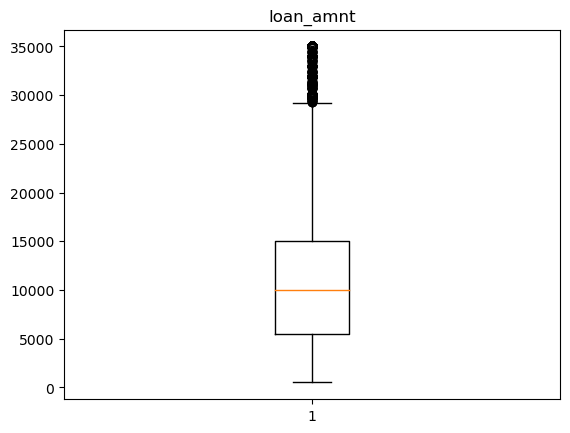

In [56]:
#Starting with loan_amnt
plt.boxplot(loan_dataset['loan_amnt'],)
plt.title('loan_amnt')
plt.show()

In [57]:
#From this boxplot we can infer there are some Outliers present for the variable loan_amnt.

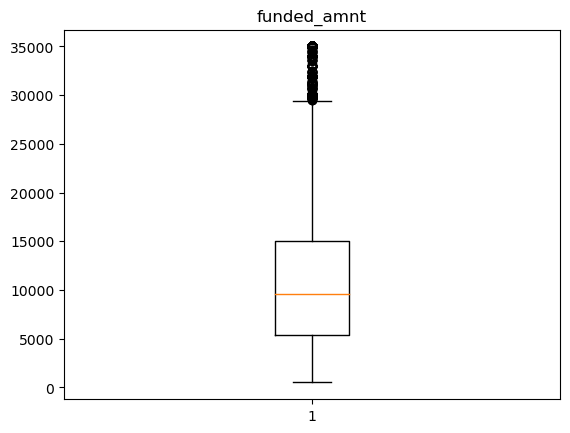

In [58]:
#Plotting for funded_amnt
plt.boxplot(loan_dataset['funded_amnt'],)
plt.title('funded_amnt')
plt.show()

In [59]:
#From this boxplot we can infer there are some outliers present for the variable funded_amnt

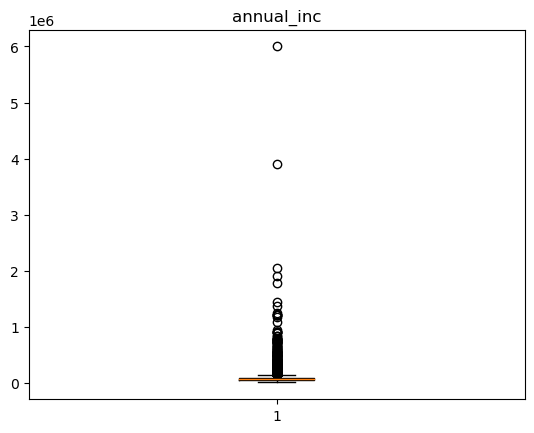

In [60]:
#Plotting for annual_inc
plt.boxplot(loan_dataset['annual_inc'],)
plt.title('annual_inc')
plt.show()

In [61]:
#From the boxplot we can see that there are some heavy outliers present for the variable annual_inc

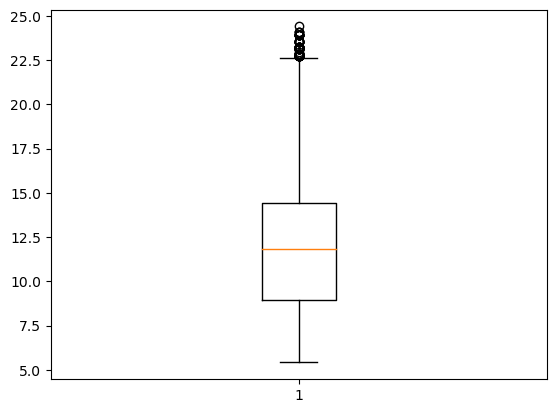

In [62]:
#Plotting for int_rate
plt.boxplot(loan_dataset['int_rate'],)
plt.show()

In [63]:
#From the boxplot we can infer that int_rate doesnt have any kind of heavy outlier and thus the outliers wont affect the data analysis as such

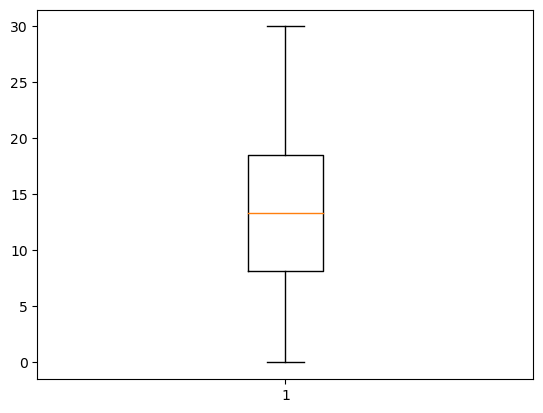

In [64]:
#Plotting for dti
plt.boxplot(loan_dataset['dti'],)
plt.show()

In [65]:
#From the boxplot we can infer that dti doesnt have any outliers at all

Removing Outliers present in loan_amnt,funded_amnt,annual_inc,int_rate using IQR

In [66]:
#Removing the outliers
set=['loan_amnt','funded_amnt','int_rate','annual_inc']
def outliers(data,columns,threshold):
    for col in columns:
        Q1=data[col].quantile(0.25)
        Q3=data[col].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-threshold*IQR
        upper_bound=Q3+threshold*IQR
        data=data[(data[col]>=lower_bound)&(data[col]<=upper_bound)]
    return data
loan_dataset=outliers(loan_dataset,set,1.5)

Lets see the boxplots of each variables after removing the outliers using Inter-Quartile Range

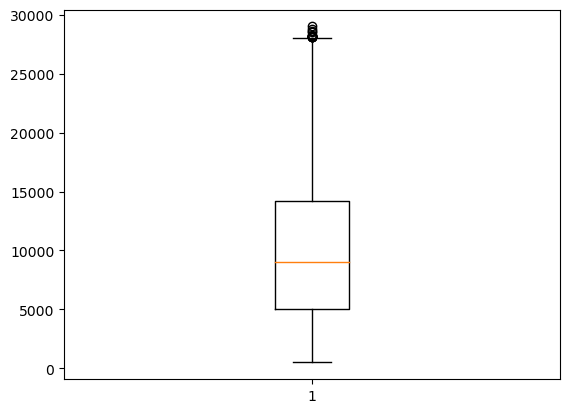

In [67]:
#Plotting for loan_amnt
plt.boxplot(loan_dataset['loan_amnt'],)
plt.show()

As we can see we have got rid of most of the outliers for loan_amnt

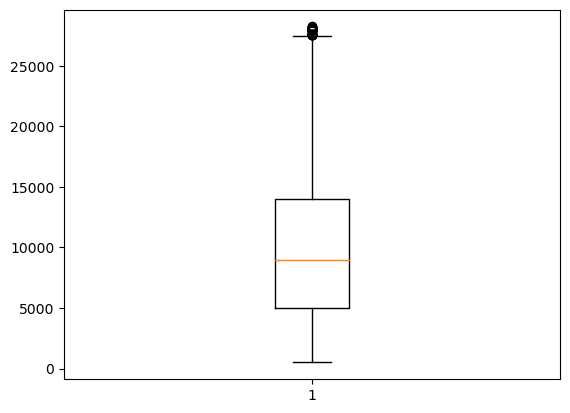

In [68]:
#Plotting for funded_amnt
plt.boxplot(loan_dataset['funded_amnt'],)
plt.show()

As we can see we have got rid of most of the outliers for funded_amnt

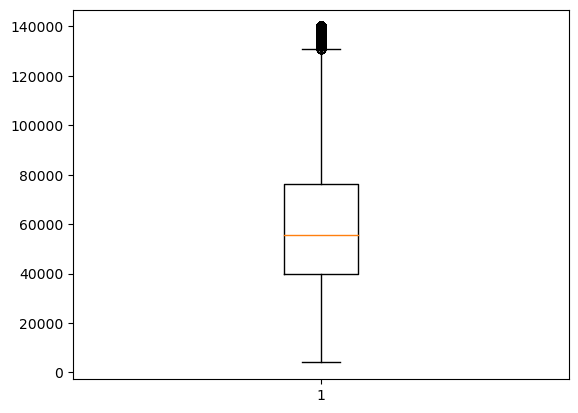

In [69]:
#Plotting for annual_inc
plt.boxplot(loan_dataset['annual_inc'],)
plt.show()

As we can see we have eliminated majority of the outliers for annual_inc variable and have made major progress in the analysis

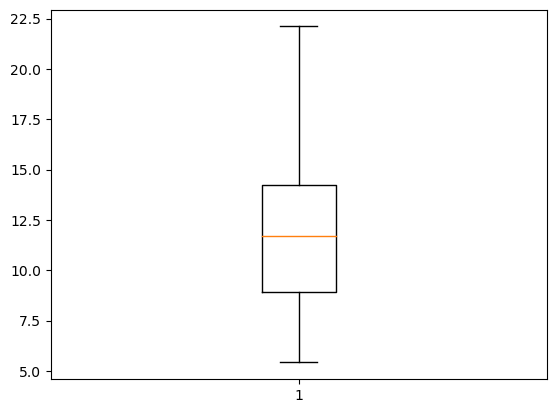

In [70]:
#Plotting for int_rate
plt.boxplot(loan_dataset['int_rate'],)
plt.show()

As we can see we have eliminated all of the outliers from int_rate variable

Univariate Analysis:

loan_status
Fully Paid     85.758282
Charged Off    14.241718
Name: count, dtype: float64


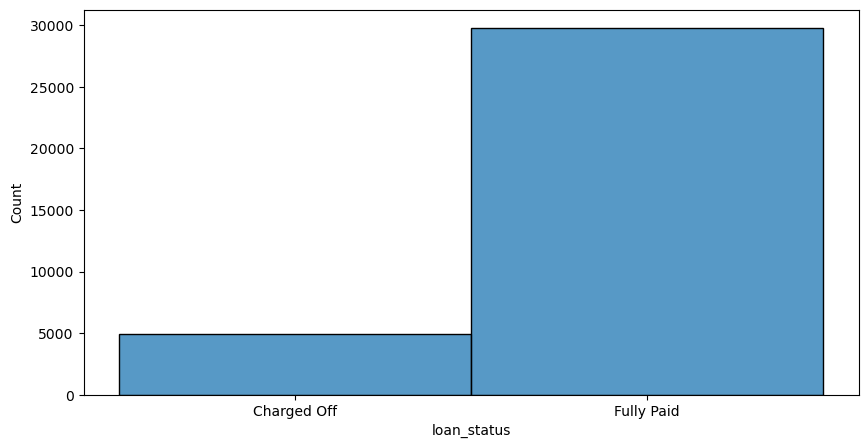

In [71]:
# Loan status 
print(loan_dataset.loan_status.value_counts()*100/loan_dataset.loan_status.count())
plt.figure(figsize=(10,5))
ax=sns.histplot(loan_dataset.loan_status)
plt.show()

We can infer from the above countplot that number of people who have defaulted is much less than the people who have fully paid their debt

count    34743.000000
mean     10211.769997
std       6231.996054
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14200.000000
max      29000.000000
Name: loan_amnt, dtype: float64


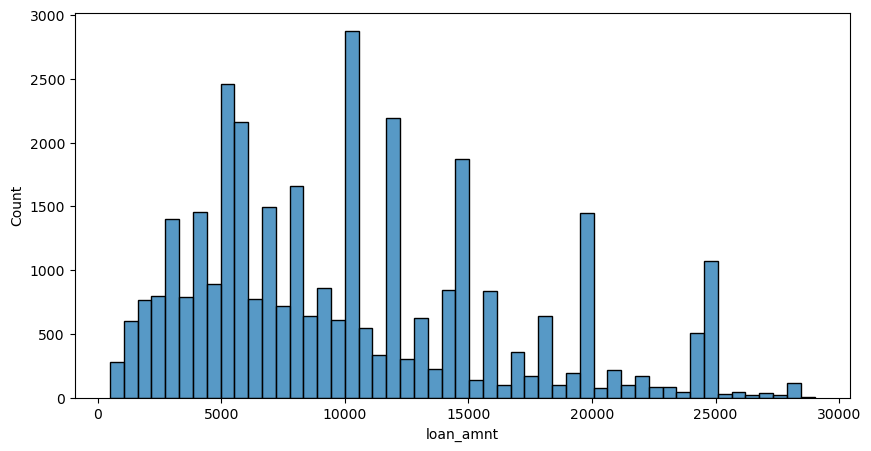

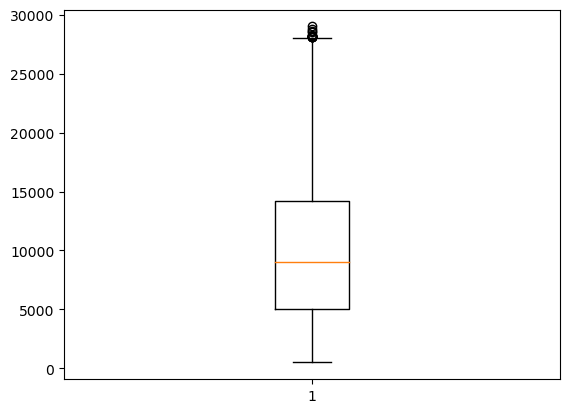

In [72]:
# Loan Amount
print(loan_dataset.loan_amnt.describe())
plt.subplots(figsize=(10,5))
ax=sns.histplot(loan_dataset.loan_amnt)
plt.show()
plt.boxplot(loan_dataset['loan_amnt'],)
plt.show()

Thus from the above histogram and boxplot we can infer that the loan_amnt varies from 500 to 29000 and majority of people borrowed a loan of 5000-14000 range

count    34743.000000
mean        11.808443
std          3.573542
min          5.420000
25%          8.940000
50%         11.710000
75%         14.260000
max         22.110000
Name: int_rate, dtype: float64


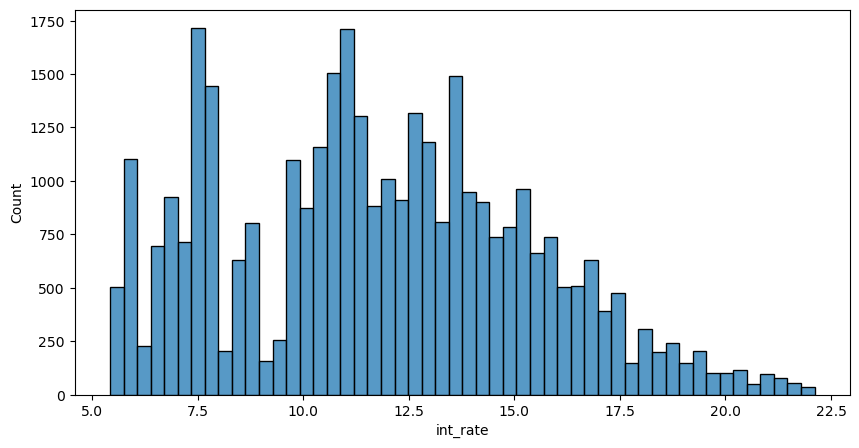

In [73]:
#Interest Rate
print(loan_dataset.int_rate.describe())
plt.subplots(figsize=(10,5))
ax=sns.histplot(loan_dataset.int_rate)
plt.show()

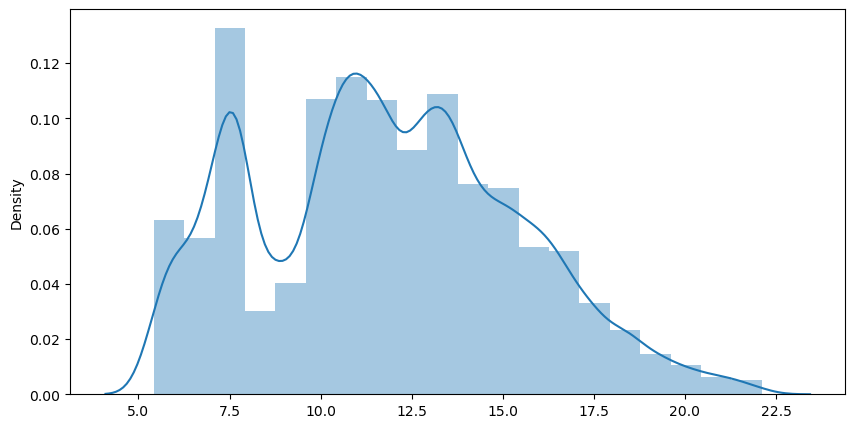

In [74]:
#Thus from the above histogram we can infer that the interest rate varies from 5.5 to 22.1 approximately and majority of the values of interest rates lie from 9 to 14.5.
plt.figure(figsize=(10,5))
ax=sns.distplot(sorted(loan_dataset.int_rate),kde=True,bins=20)
plt.show()

From the above distplot we can see the distribution trend of int_rate across the board. We can observe that there is an abnormal spike of interest rate values around 7.5 and a dip in values of 8 upto 9 percent.
We can observe that the distribution from 5.5 to 10 is less crowded than 10 to 15.
The above observation infers that most loans offer interest rates at around 10 to  15.

count     34743.000000
mean      60599.554134
std       27313.168824
min        4000.000000
25%       40000.000000
50%       55560.000000
75%       76366.500000
max      140000.000000
Name: annual_inc, dtype: float64


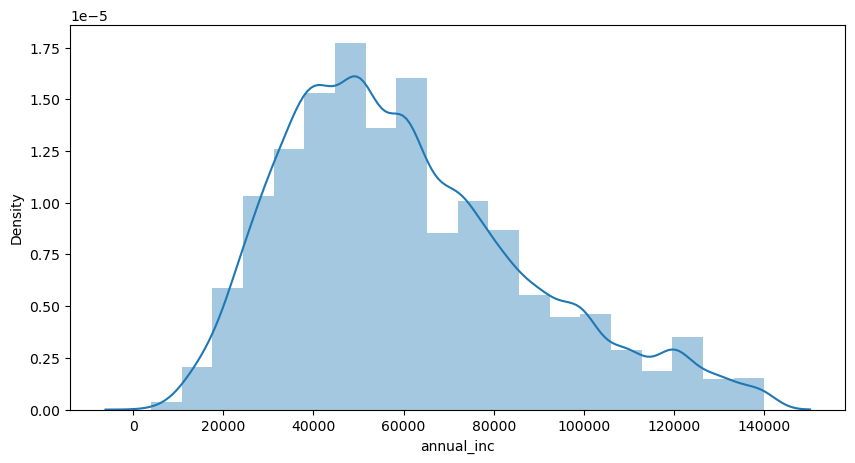

In [75]:
#Annual Income
print(loan_dataset.annual_inc.describe())
plt.figure(figsize=(10,5))
sns.distplot(loan_dataset.annual_inc,kde=True,bins=20)
plt.show()

From the above distplot we can observe that most of the borrowers have comparatively low annual income, about the range of 40000-65000.
Frequency of borrowers having comparatively high annual income or at least greater than 70000 is very low.

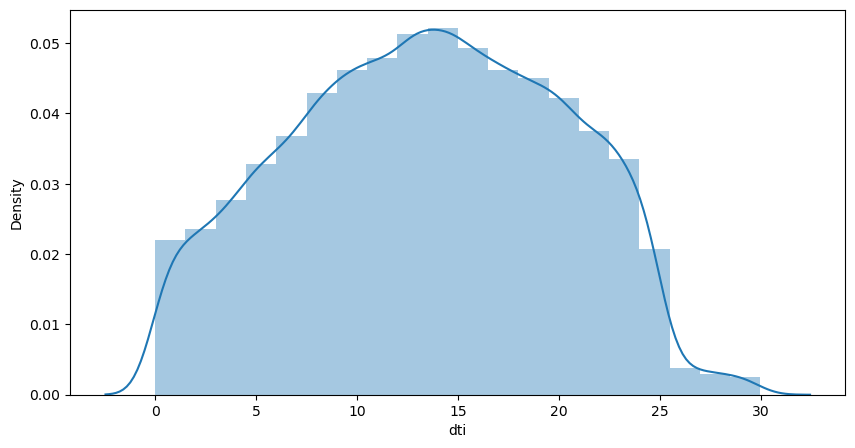

In [76]:
# Debt to Income Ratio or DTI
plt.figure(figsize=(10,5))
sns.distplot(loan_dataset.dti,bins=20)
plt.show()

From the above countplot we can see that majority of the borrowers have a DTI ratio of 10 to 15 percent which means most borrowers are in acceptable range of DTI.

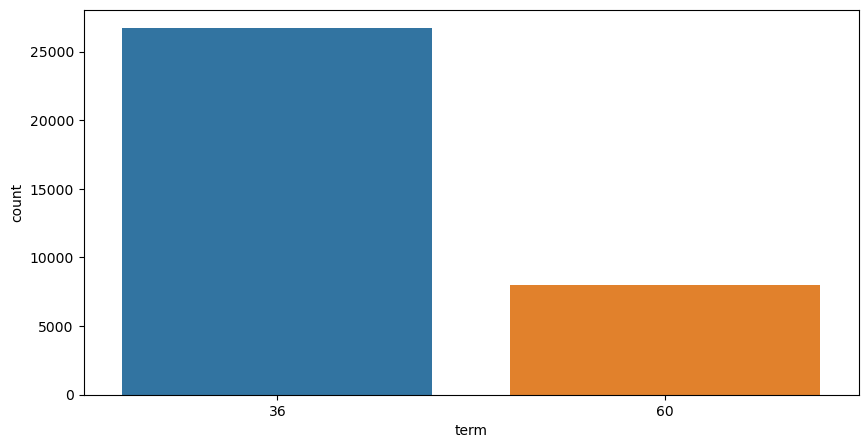

In [77]:
#Term of loan
plt.figure(figsize=(10,5))
ax=sns.countplot(x=loan_dataset.term)
plt.show()

As we can see from the above countplot that more than half of the loans have term period of 36 months rather than 60 months.


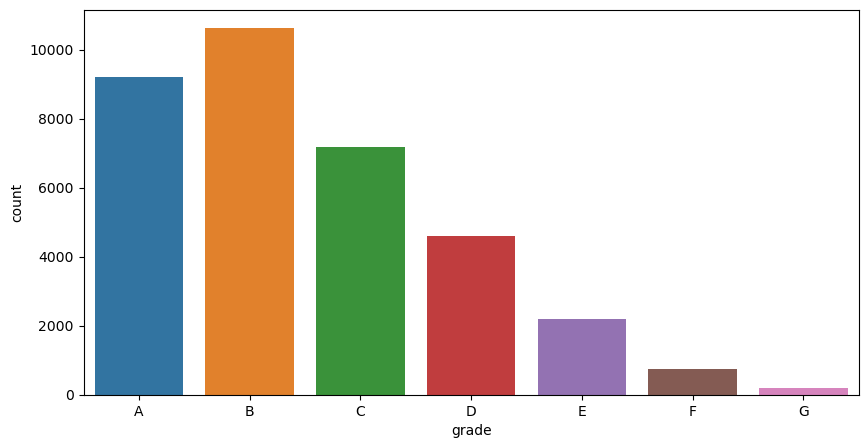

In [78]:
#Distribution of Grade
plt.figure(figsize=(10,5))
sns.countplot(x=loan_dataset.grade)
plt.show()

As we can see that most loans are of grade 'A' and 'B' and 'C' thus we can infer from the countplot that most loans that are borrowed are high grade loans.

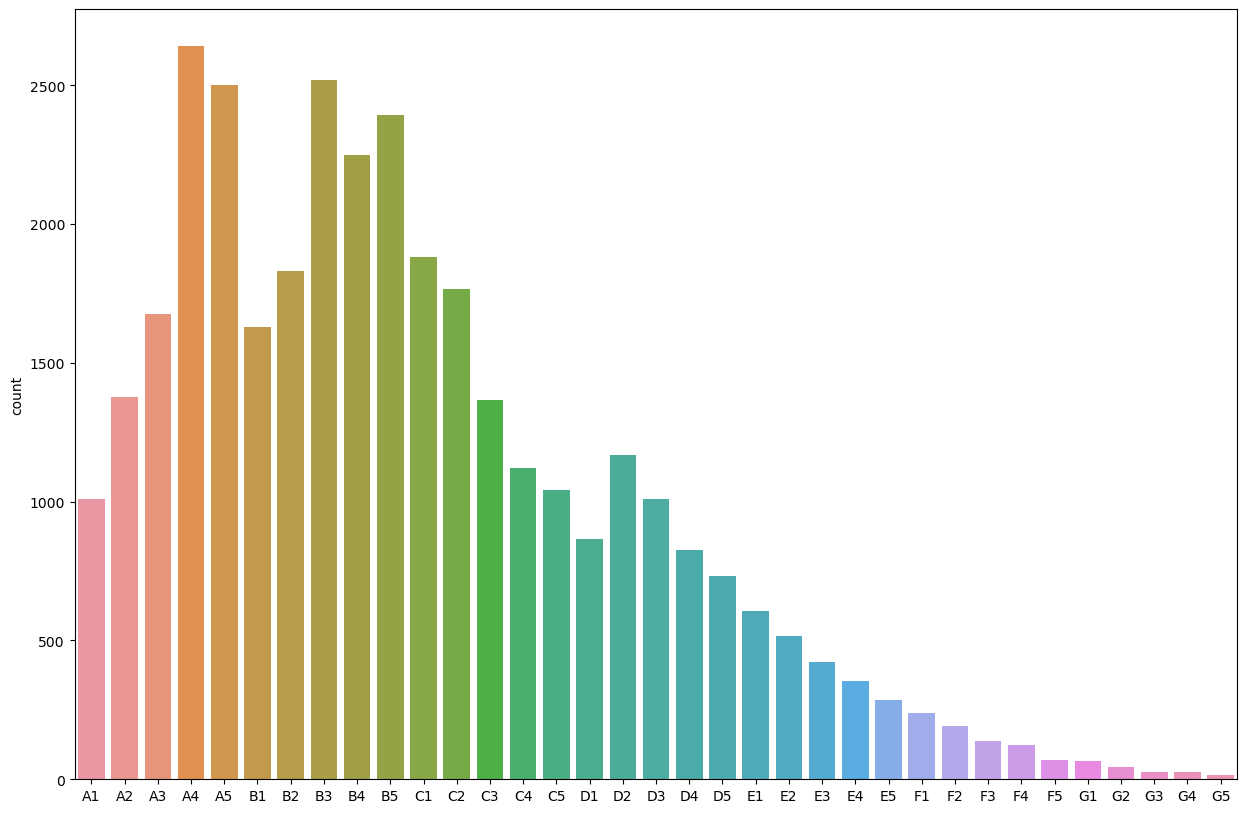

In [79]:
#Distribution of Sub-Grade
plt.figure(figsize=(15,10))
sns.countplot(x=sorted(loan_dataset.sub_grade))
plt.show()

As we can see most loans are of lower sub_grades of 'A' and 'B' compared to rest. 
This matches with Grade distribution

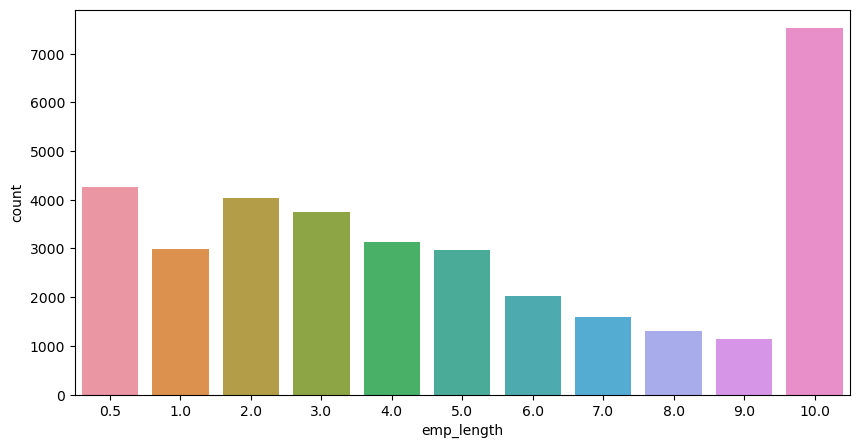

In [80]:
#Distribution of Employment Length
plt.figure(figsize=(10,5))
sns.countplot(x=loan_dataset.emp_length)
plt.show()

From the above countplot we can infer that most of the borrowers have working Experience of over 10 years.

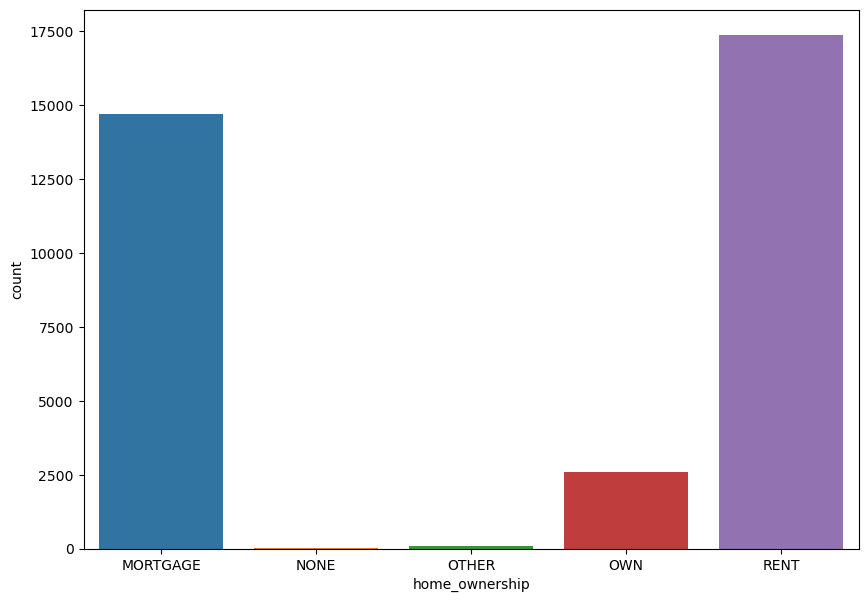

In [81]:
#Home Ownership Distribution
plt.figure(figsize=(10,7))
sns.countplot(x=loan_dataset.home_ownership)
plt.show()

From the above countplot we can infer that majority of borrowers live in rented properties followed by the people who are on mortgage.
Very few borrowers actually own a property.

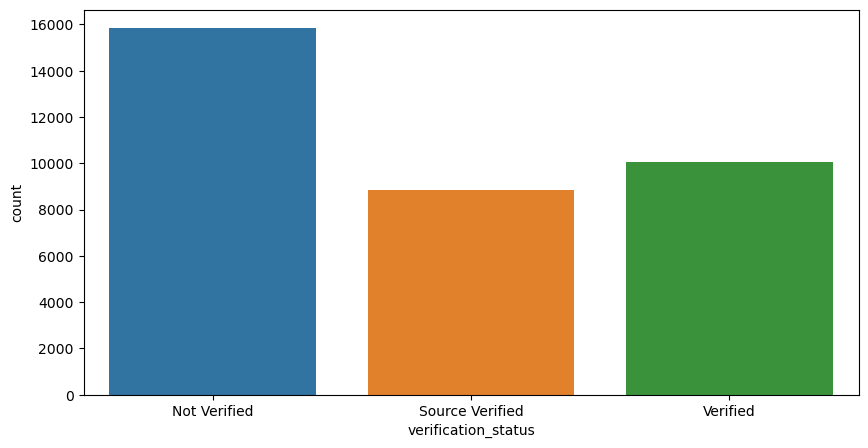

In [82]:
#Verification Status
plt.figure(figsize=(10,5))
sns.countplot(x=loan_dataset.verification_status)
plt.show()

From the above countplot we can infer that almost 50% of the borrowers are verified by the company that is they are source verified.

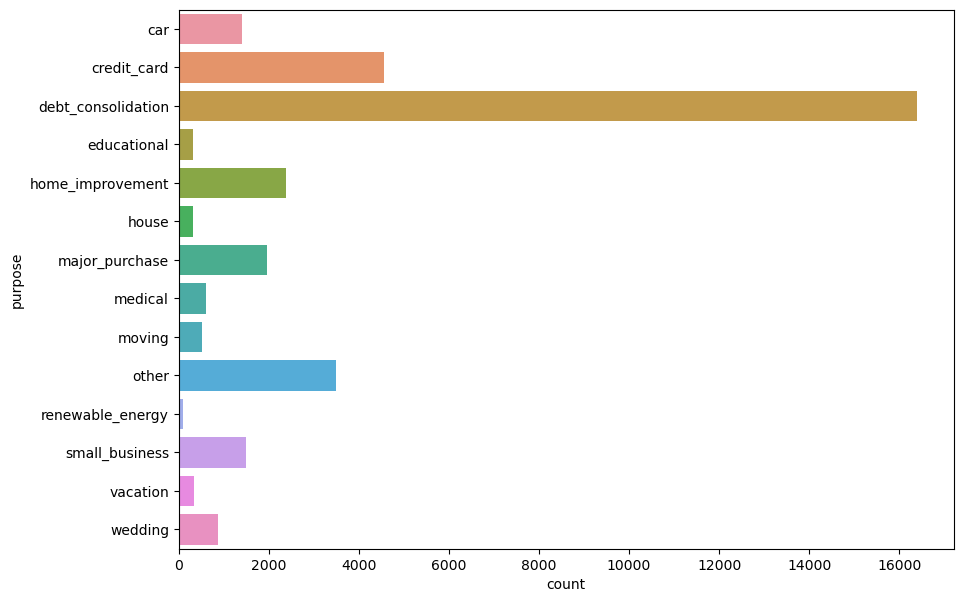

In [83]:
# Distribution of purpose
plt.figure(figsize=(10,7))
sns.countplot(y=loan_dataset.purpose)
plt.show()

From the above countplot we can infer that most loans are borrowed for the purpose of debt consolidation followed by Credit card and miscellaneous purposes.

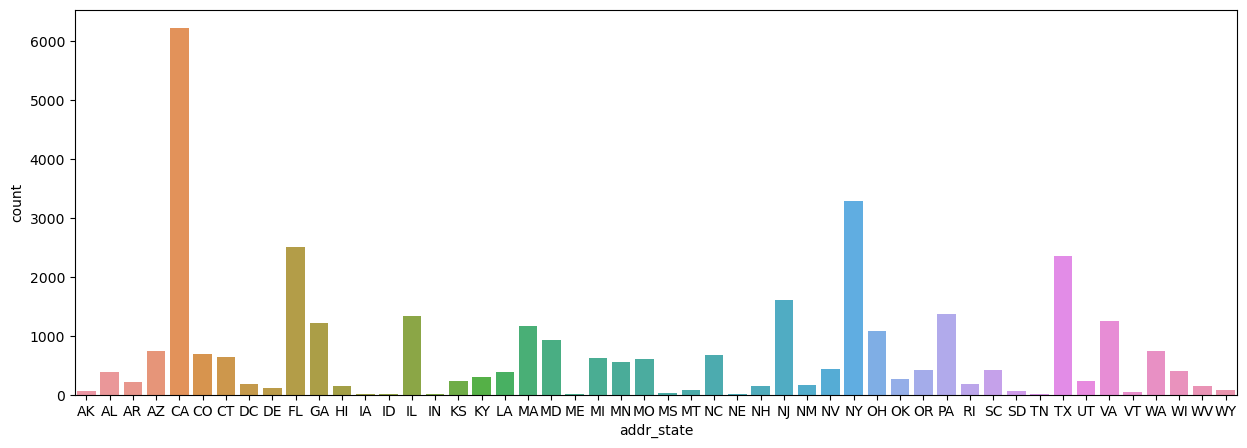

In [84]:
# Distribution of State of Address
plt.figure(figsize=(15,5))
sns.countplot(x=loan_dataset.addr_state,)
plt.show()

From the above countplot we can infer that majority of the borrowers are from California.followed by New York and Texas.

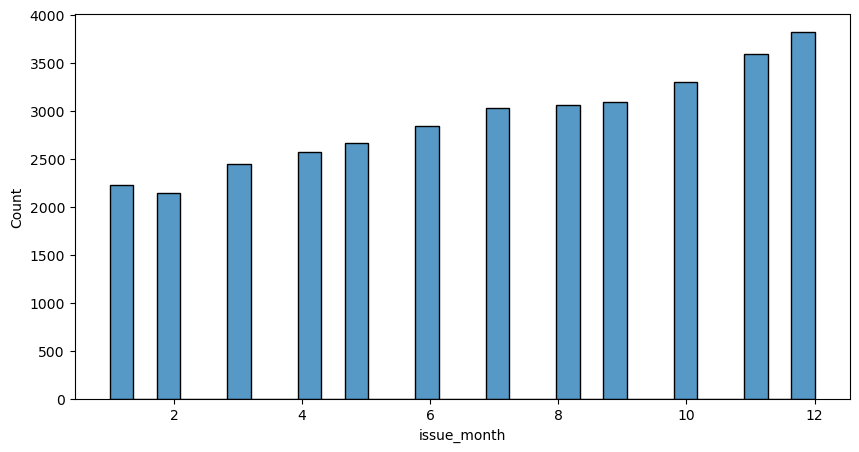

In [85]:
# Distribution of issue_month
plt.figure(figsize=(10,5))
sns.histplot(loan_dataset.issue_month)
plt.show()

Thus from the above histplot we can infer that majority of the loans are given in the last quarter of the year.

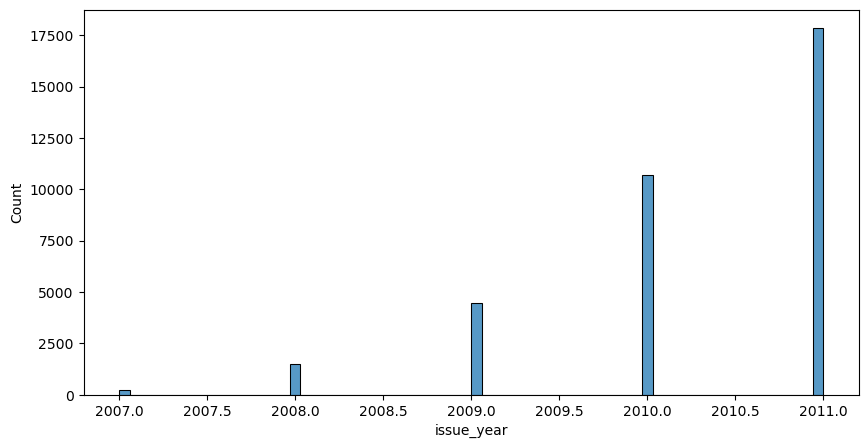

In [86]:
# Distribution of issue_year
plt.figure(figsize=(10,5))
sns.histplot(loan_dataset.issue_year,)
plt.show()

Thus from the above histplot we can infer that the number of loans approved each year has increased at a exponential rate almost.

Segmented Univariate Analysis

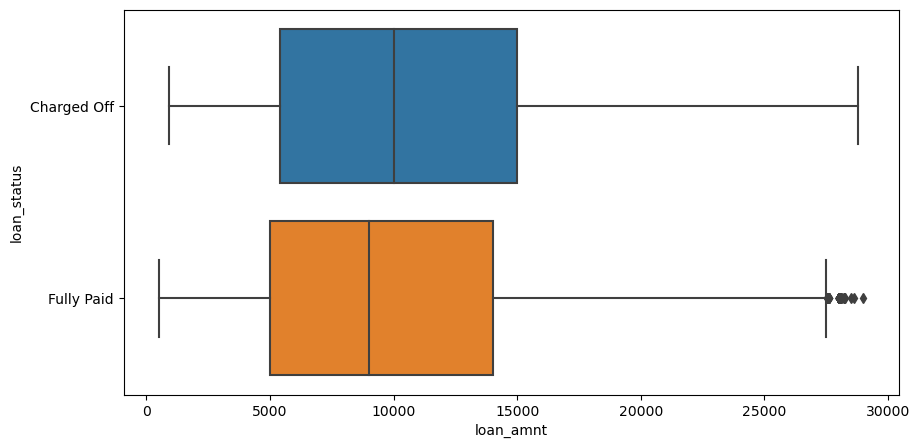

In [87]:
#Distribution of Loan Ammount based on Loan Status
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_dataset,x='loan_amnt',y='loan_status')
plt.show()

As we can see from the boxplots above, the median and 25% are almost same for both Full Paid and Charged Off,but we see an increase in the 75% in case of Charged Off status.
This observation infers that there is a higher chance of defaulting in case of larger loan amounts.

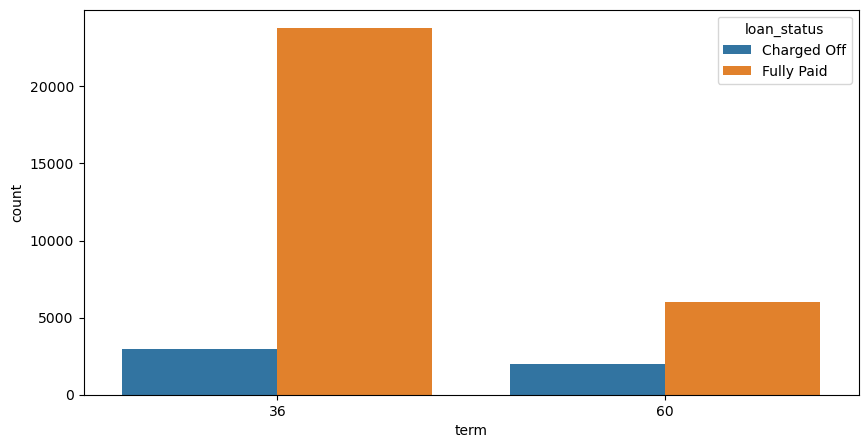

In [88]:
#Distribution of term based on Loan Status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_dataset,x='term',hue='loan_status')
plt.show()

As we can see from above countplot, the likelihood of loans being repayed for loan terms of 36 months is higher compared to loan term of 60 months.
Thus we can infer that the loans with loan term of 60 months have a higher chance to be defaulted.

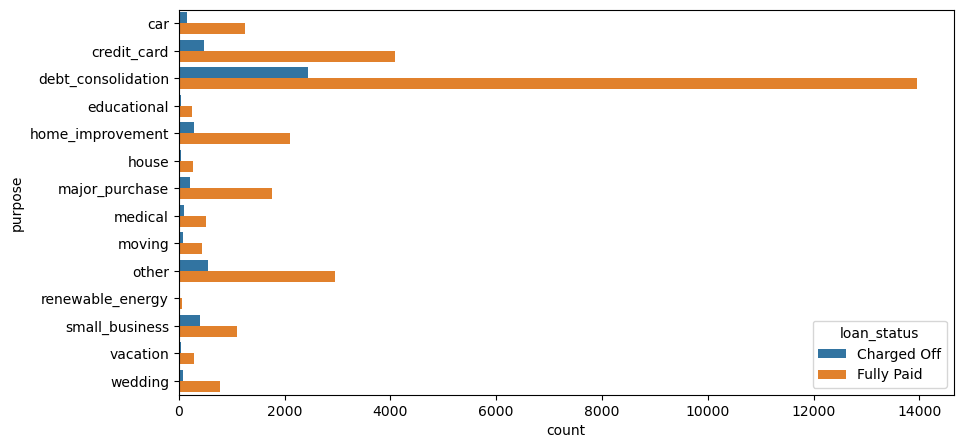

In [89]:
# Distribution of Purpose based on Loan Status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_dataset,y='purpose',hue='loan_status')
plt.show()

From the above countplot we can infer that debt consolidation is the most used purpose to borrow money and subsequently has the highest number of Fully Paid loans and Charged Off loans. 

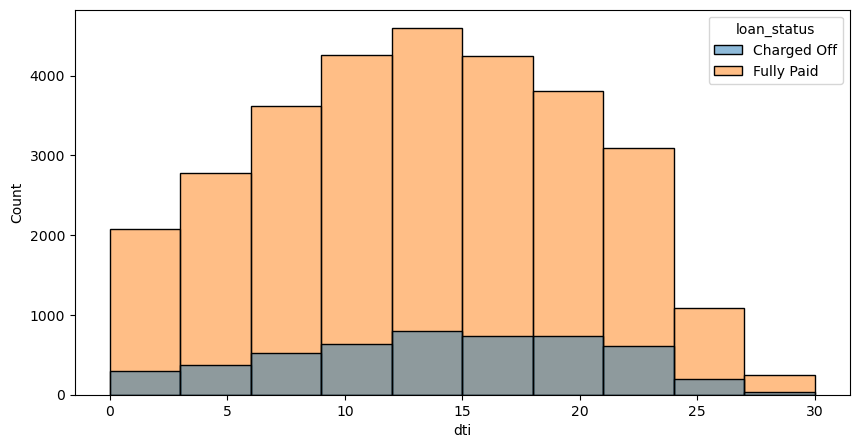

In [90]:
# Distribution of DTI based on Loan Status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_dataset,x='dti',hue='loan_status',bins=10)
plt.show()

As we can see from the histplot above that the number of loans being repaid in full and defaulted increases with increasing DTI upto 15, but starts decreasing for DTI's higher than 15.
This infers that for the borrowers having DTI's from 10 to 15 have a higher chance of defaulting 

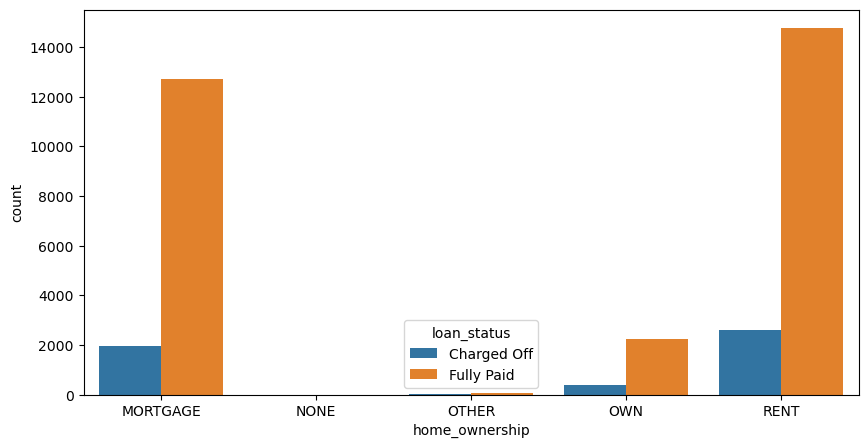

In [91]:
# Distribution of House Ownership based on Loan Status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_dataset,x='home_ownership',hue='loan_status')
plt.show()

From the above countplot we can infer that the number of defaulters for the people renting a property and on mortgage is almost same , compared to people who own homes.
Thus we can infer that people who own homes have a lower chance of defaulting.

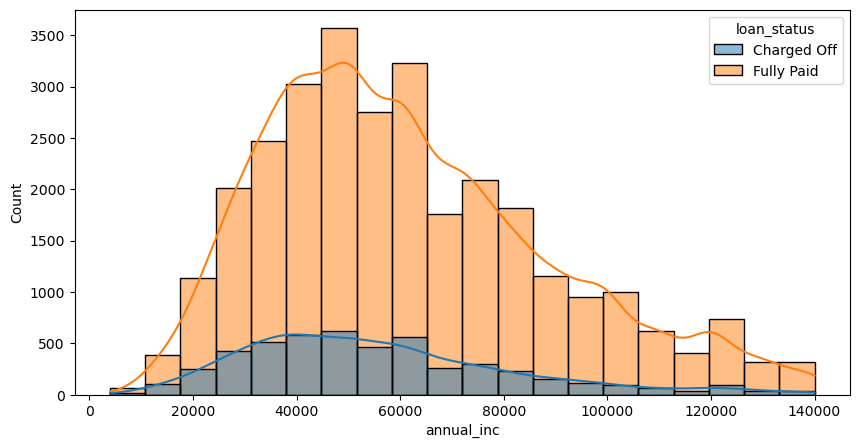

In [92]:
#Distribution of Annual Income based on Loan Status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_dataset,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.show()

As we can see from the histplot above, Borrowers earning less than or equal to 50000 per annum are more likely to default compared to borrowers having higher annual income with one exception of borrowers earning 60000 to 64000.

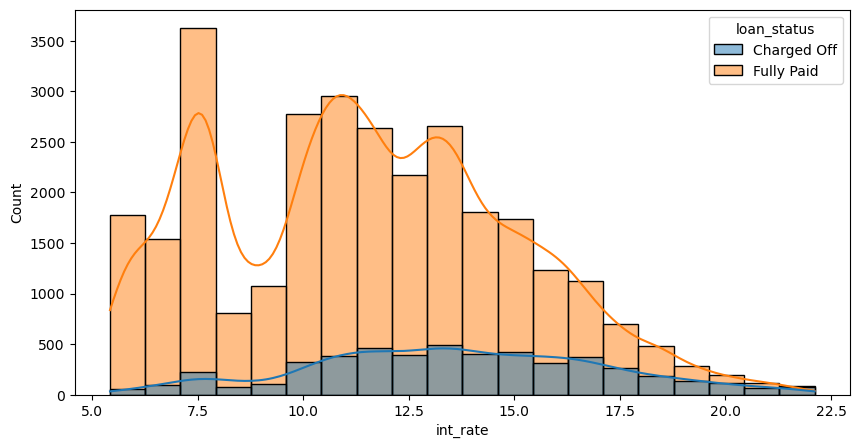

In [93]:
# Distribution of Interest Rate based on Loan Ammount
plt.figure(figsize=(10,5))
sns.histplot(data=loan_dataset,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.show()

As we can see from the above histplot that the number of defaulters increases with increasing interest rate and is almost uniform from 11 to 15 after which we see a drop of defaulting number upto 17.5 after which the number of defaulting is very less.
Thus we can infer that the number of defaulting increases with increase in interest rate upto 11 and holds uniform upto 17.5 post which it decreases.

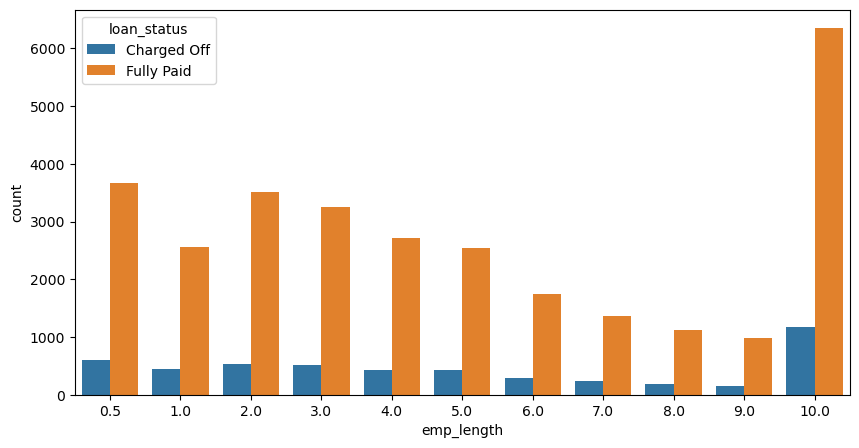

In [94]:
#Distribution of Employment Length based on Loan Status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_dataset,x='emp_length',hue='loan_status')
plt.show()

As we can see from the above countplot that employees having more than 10 years of working experience have a higher likelihood of repaying the loan as well as defaulting from the loan payment.

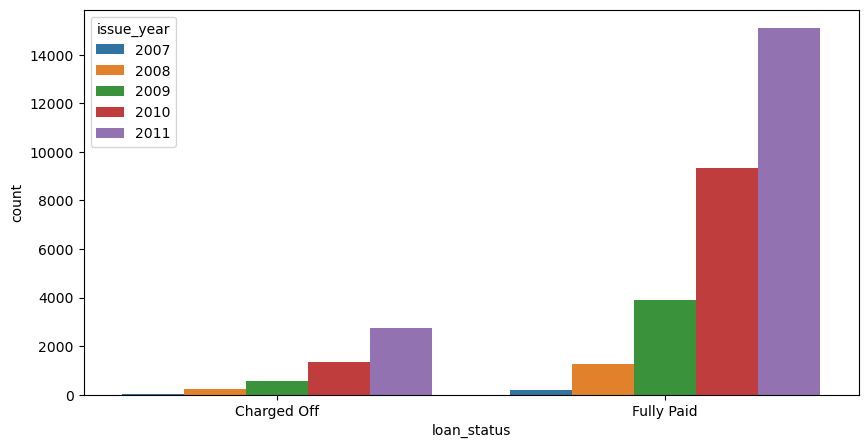

In [95]:
#Distribution of Loan Status based on Issue Year
plt.figure(figsize=(10,5))
sns.countplot(data=loan_dataset,x='loan_status',hue='issue_year')
plt.show()

As we can see from the above countplot that the number of Fully Paid loans is increasing almost exponentially each year compared to defaulted loans.

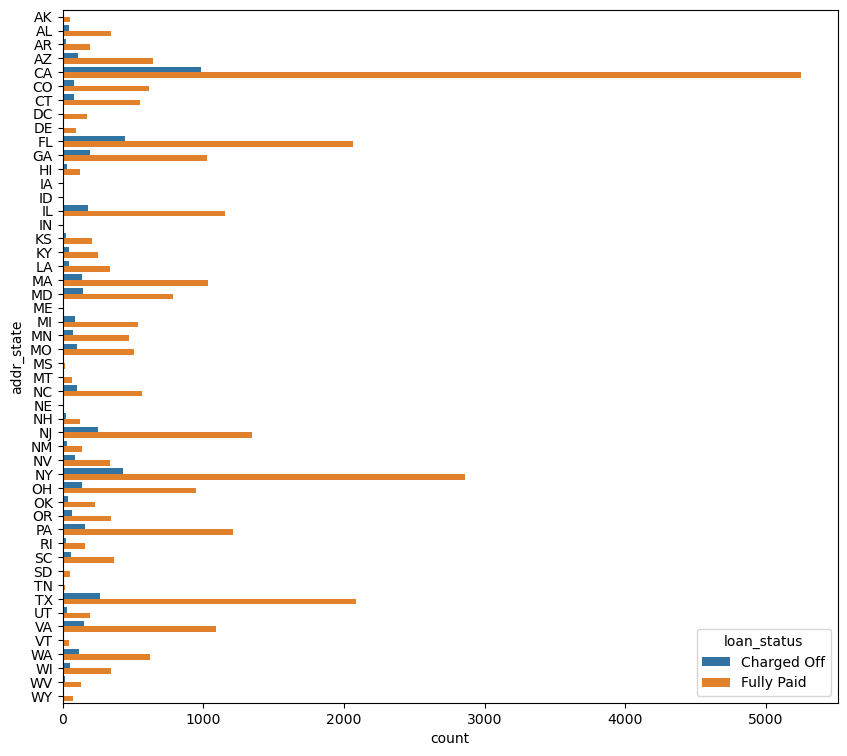

In [96]:
#Distribution of State of Address based on Loan Status
plt.figure(figsize=(10,9))
sns.countplot(data=loan_dataset,y='addr_state',hue='loan_status')
plt.show()

Thus from the above countplot we can infer that the people residing in California,New York and Florida are most likely to Fully pay back the loan and also default from the loan.

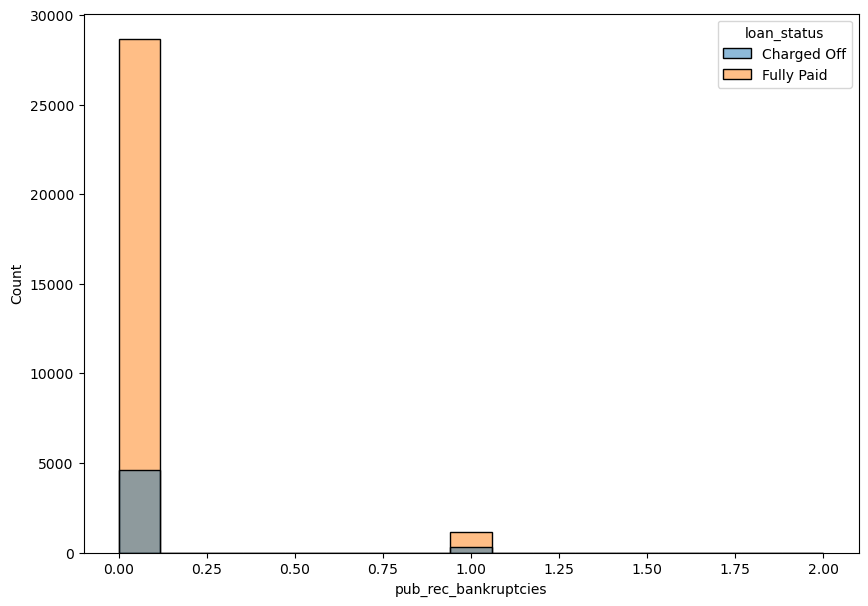

In [97]:
# Comparing Public Record Bankruptcies based on Loan Status
plt.figure(figsize=(10,7))
sns.histplot(data=loan_dataset,x='pub_rec_bankruptcies',hue='loan_status')
plt.show()

So we can infer from the above plot that people with 0 public record bankruptcies have the highest number of fully paid loans as well as defaulted loans.

Bivariate Analysis:

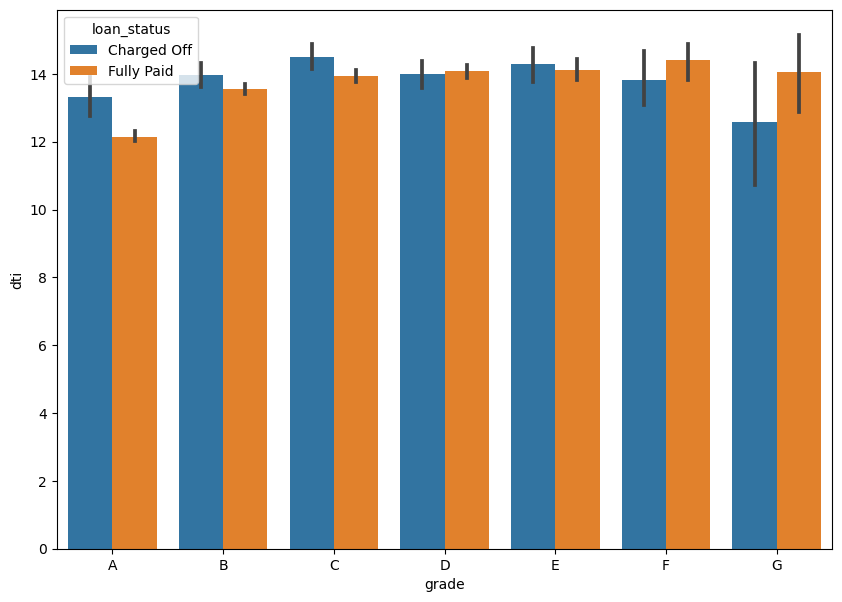

In [98]:
#Comparison of DTI over Grade for Loan Status
#Grade represents the loan classification and risk factor associated with it.
plt.figure(figsize=(10,7))
sns.barplot(data=loan_dataset,y='dti',x='grade',hue='loan_status')
plt.show()

In this analysis we can see for grade A (which is the lowest classification of loans) ,the loans which are defaulted have fairly low DTI and for loans which are fully paid for grade A have even lower DTI.
For grade C we can see for the loans which are defaulted have the highest DTI along with loans which are paid in Full 
For grades higher than C we can see that likelihood of loans getting paid fully is greater for greater DTI's.

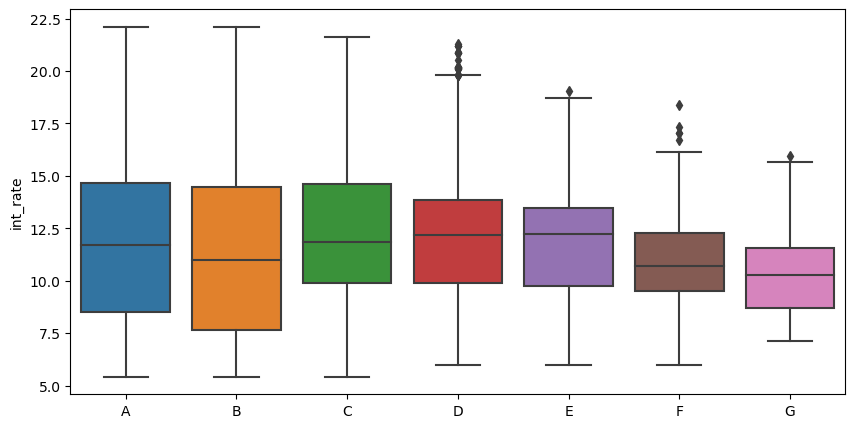

In [99]:
#Comparison of Interest rate based on Grade
plt.figure(figsize=(10,5))
loan_dataset.sort_values(by=['grade'],ascending=True)
sns.boxplot(data=loan_dataset,y='int_rate',x=sorted(loan_dataset.grade))
plt.show()

As we can see from the analysis above that the median interest rate for all grades upto grade E is almost same with the exception of grade B where it drops a little.
The median Interest rate decreases with each grade after grade E.
The 75% percentile follows a declining curve with increase in grade.
The 25% percentile drops for grade B but rises again for grade C after which it follows a declining curve with increasing grade.
All these observations infer that the higher the loan grade the lower the interest rate and grade B has the broadest Inter Quartile range and thus contains a large spectrum of interest rates 

Correlation Analysis of the Numerical Columns:

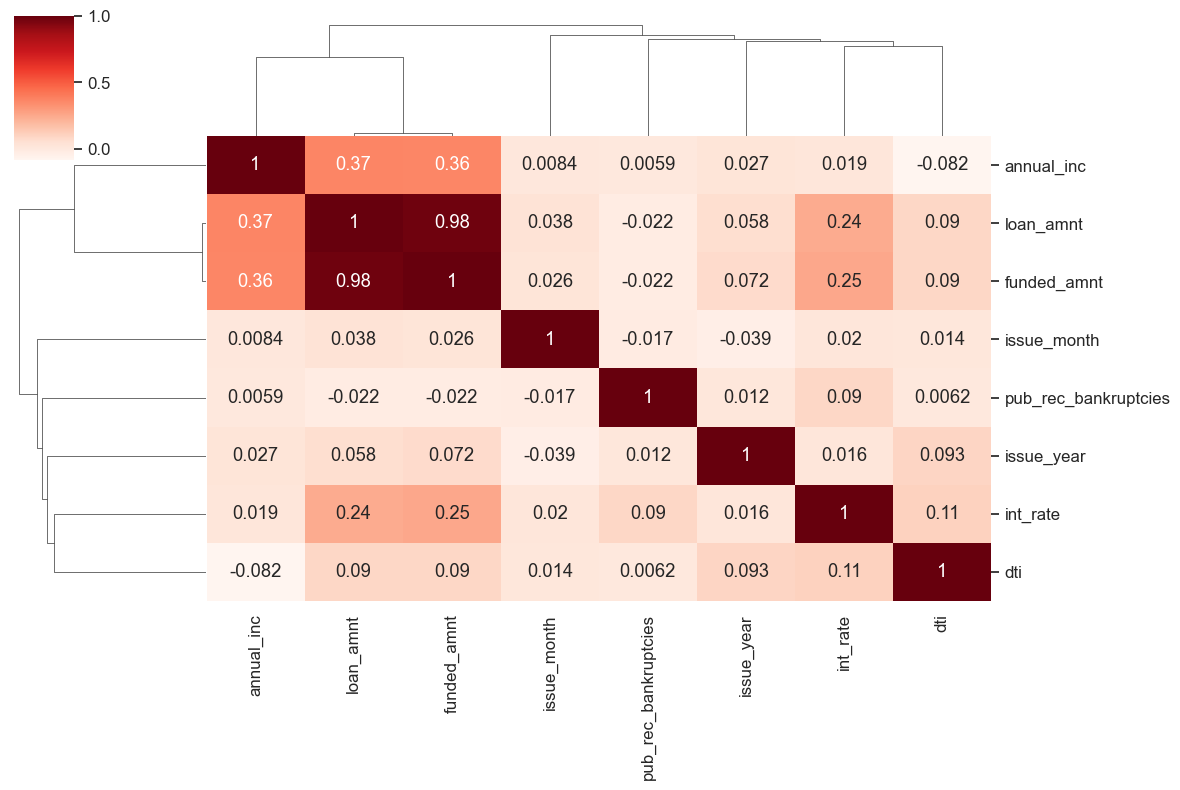

In [100]:
#Correlation Analysis
corr_dataset=loan_dataset.filter(['loan_amnt','funded_amnt','int_rate','annual_inc','dti','pub_rec_bankruptcies','issue_year','issue_month'],axis=1)
sns.set(font_scale=1.1)
sns.clustermap(corr_dataset.corr(),annot=True,figsize=(12,8),cmap="Reds")
plt.show()

The Correlation analysis of the numerical columns showed that:
There is a high correlation between funded_amnt and loan_amnt.
There is a moderate correlation between annual_inc and loan_amnt.
There is a moderate correlation between annual_inc and funded_amnt.
There is a moderate correlation between int_rate and loan_amnt.
There is a moderate correlation between int_rate and funded_amnt.


Major driving factors  which can be used to predict loan defaulters are:DTI,Loan Term Period,Loan Amount,Annual Income,Grade,Home Ownership,Interest Rate


We can refer to the comparative analysis of all these variables to figure out and predict loan defaulters and then come up with strategy to minimize defaulting by addressing all these factors.
